## 1.1 붓꽃 데이터 읽어와서 확인

In [2]:
import pandas as pd
filename = 'materials/6장/iris.csv'
iris=pd.read_csv(filename)
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
count=pd.DataFrame(iris['Species'].value_counts())
count

,Species
setosa,50
versicolor,50
virginica,50


## 1.2 붓꽃 데이터 전처리

In [8]:
iris.isnull().sum() # 각 열의 결측값의 개수를 계산

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [9]:
iris.duplicated().sum()

1

In [12]:
index=iris.duplicated()
iris.loc[index,:]
# 142번 데이터가 중복된다.

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
142,5.8,2.7,5.1,1.9,virginica


In [15]:
result = (iris['SepalLength']==5.8) & (iris['PetalWidth']==1.9)
iris.loc[result,:] # 어떤 데이터가 중복되는지 확인

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [16]:
iris=iris.drop_duplicates()
# iris.duplicated().sum()
result = (iris['SepalLength']==5.8)&(iris['PetalWidth']==1.9)
iris.loc[result,:]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
101,5.8,2.7,5.1,1.9,virginica


## 1.3 붓꽃 데이터 그룹핑

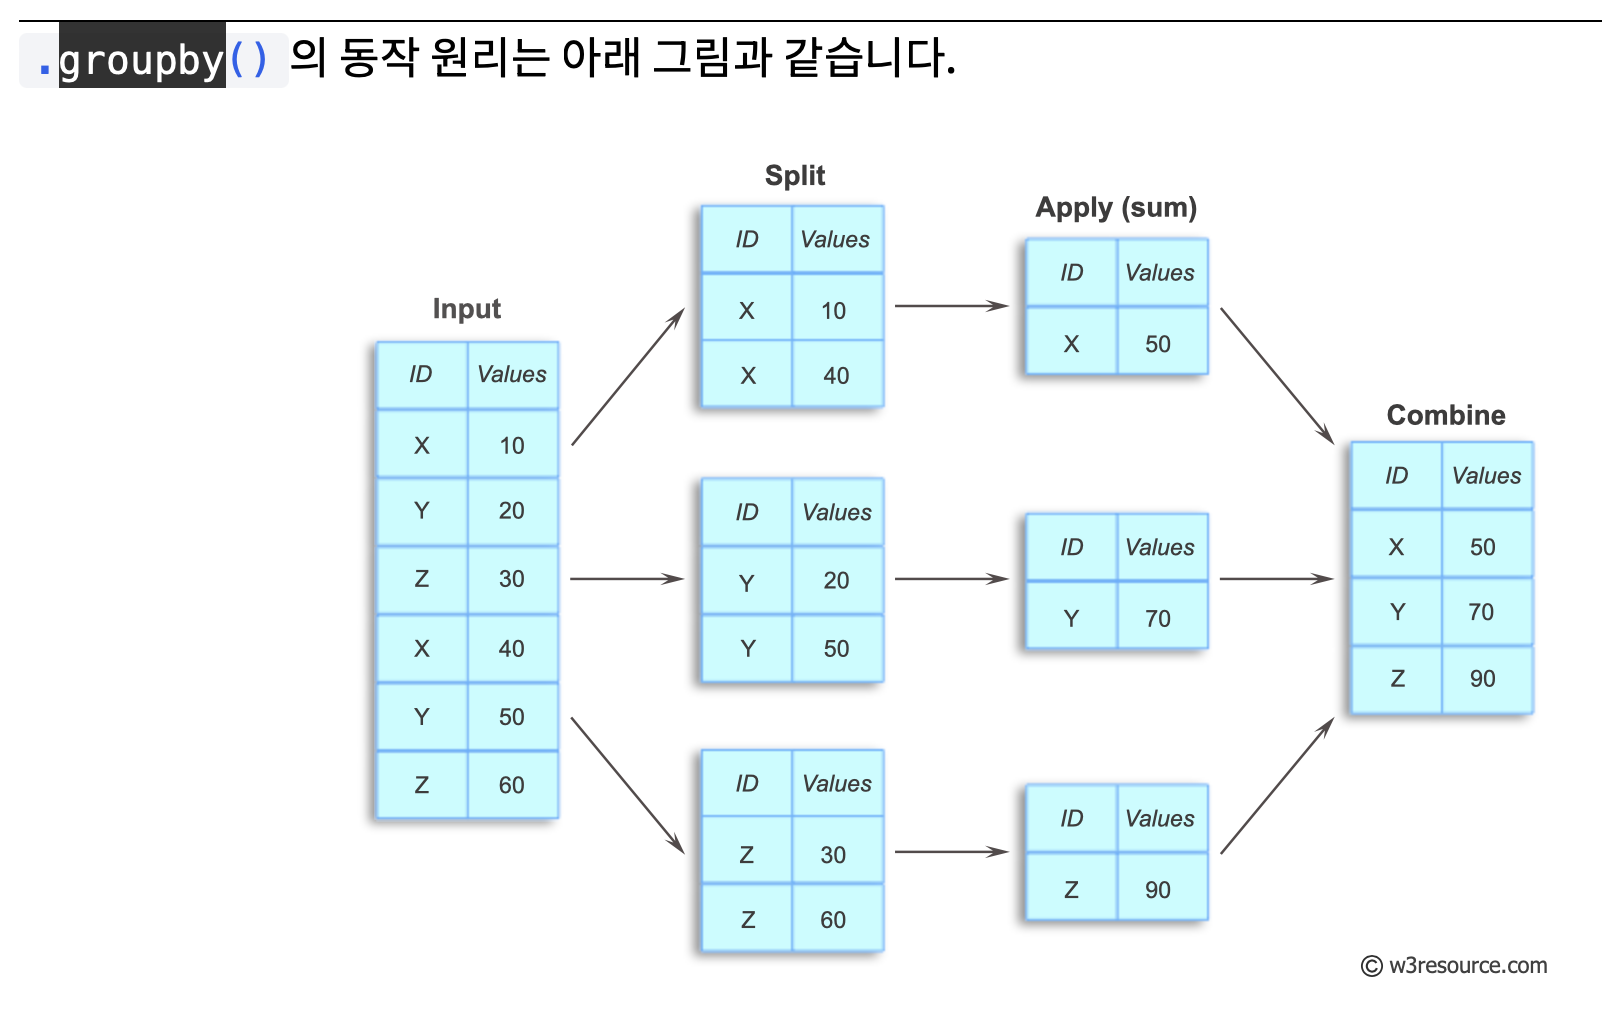

In [17]:
iris.groupby('Species').sum() # 품종 열을 기준으로 합계 구하기

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,323.6,146.0,272.5,99.4


In [18]:
iris.groupby('Species').mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


In [24]:
# sklearn(사이킷런)에서 붓꽃데이터 셋 불러오기
from sklearn.datasets import load_iris
iris_dataset=load_iris()
# iris_dataset.keys()
df = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
import seaborn as sns
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1.4 판다스의 데이터 시각화

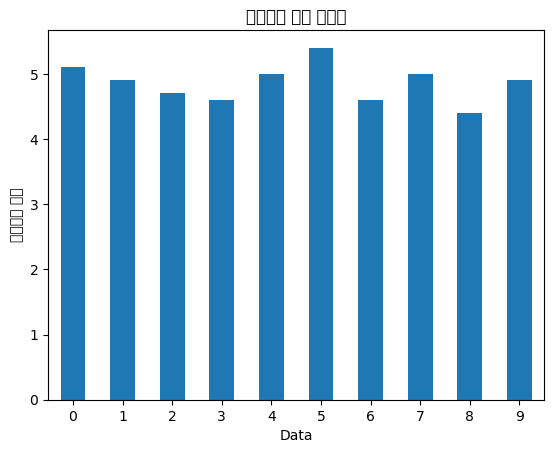

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
filename = 'materials/6장/iris.csv'
iris = pd.read_csv(filename)
iris.head()
iris.SepalLength[:10].plot(kind='bar', rot=0) # 'rot=0'으로 설정하면 x 축 레이블이 수직으로 표시
plt.title("꽃받침의 길이 시각화")
plt.xlabel("Data")
plt.ylabel("꽃받침의 길이")
plt.show()

In [27]:
df2 = iris.groupby(iris['Species']).mean()
df2

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


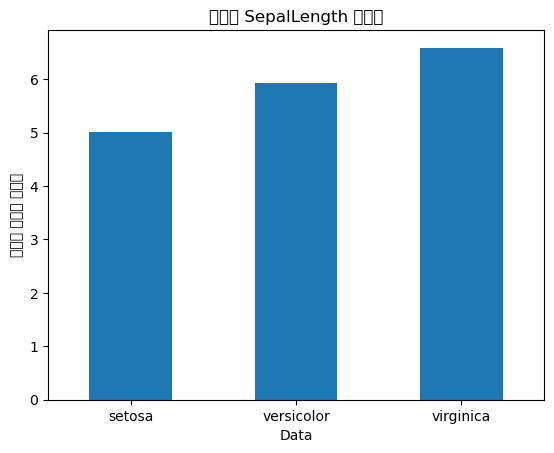

In [29]:
df2.SepalLength[:].plot(kind='bar', rot=0)
plt.title('품종별 SepalLength 그래프')
plt.xlabel('Data')
plt.ylabel('꽃받침 길이의 평균값')
plt.show()

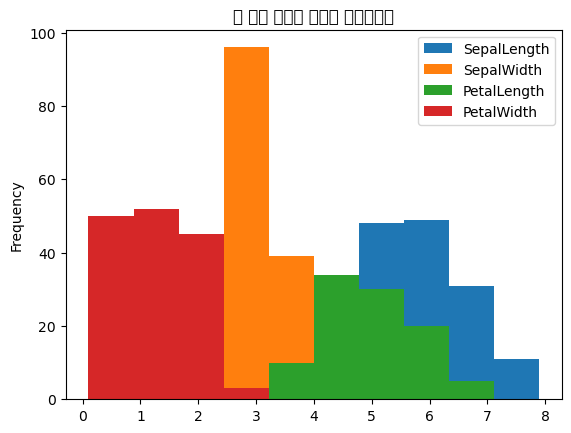

In [30]:
iris.plot(kind='hist') # iris.plot.hist()
plt.title('각 특징 값들의 빈도수 히스토그램')
plt.show()

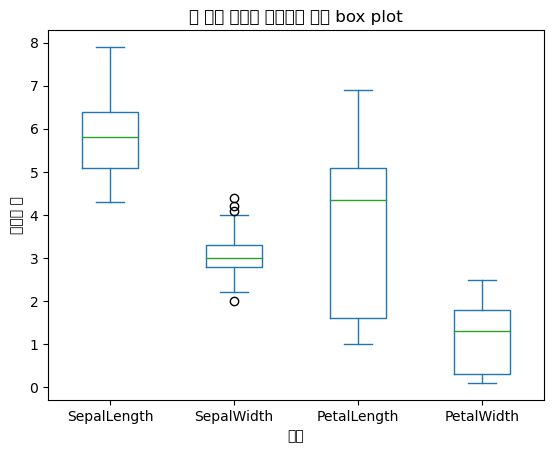

In [31]:
# 상자 그래프 그리기
# 사분위수 범위를 확인해 데이터의 분포를 파악하고 이상치(outliner) 유무를 확인할 때 사용할 수도 있다.
iris.plot(kind='box')
plt.title('각 특징 값들의 빈도수에 대한 box plot')
plt.xlabel('특징')
plt.ylabel('데이터 값')
plt.show()

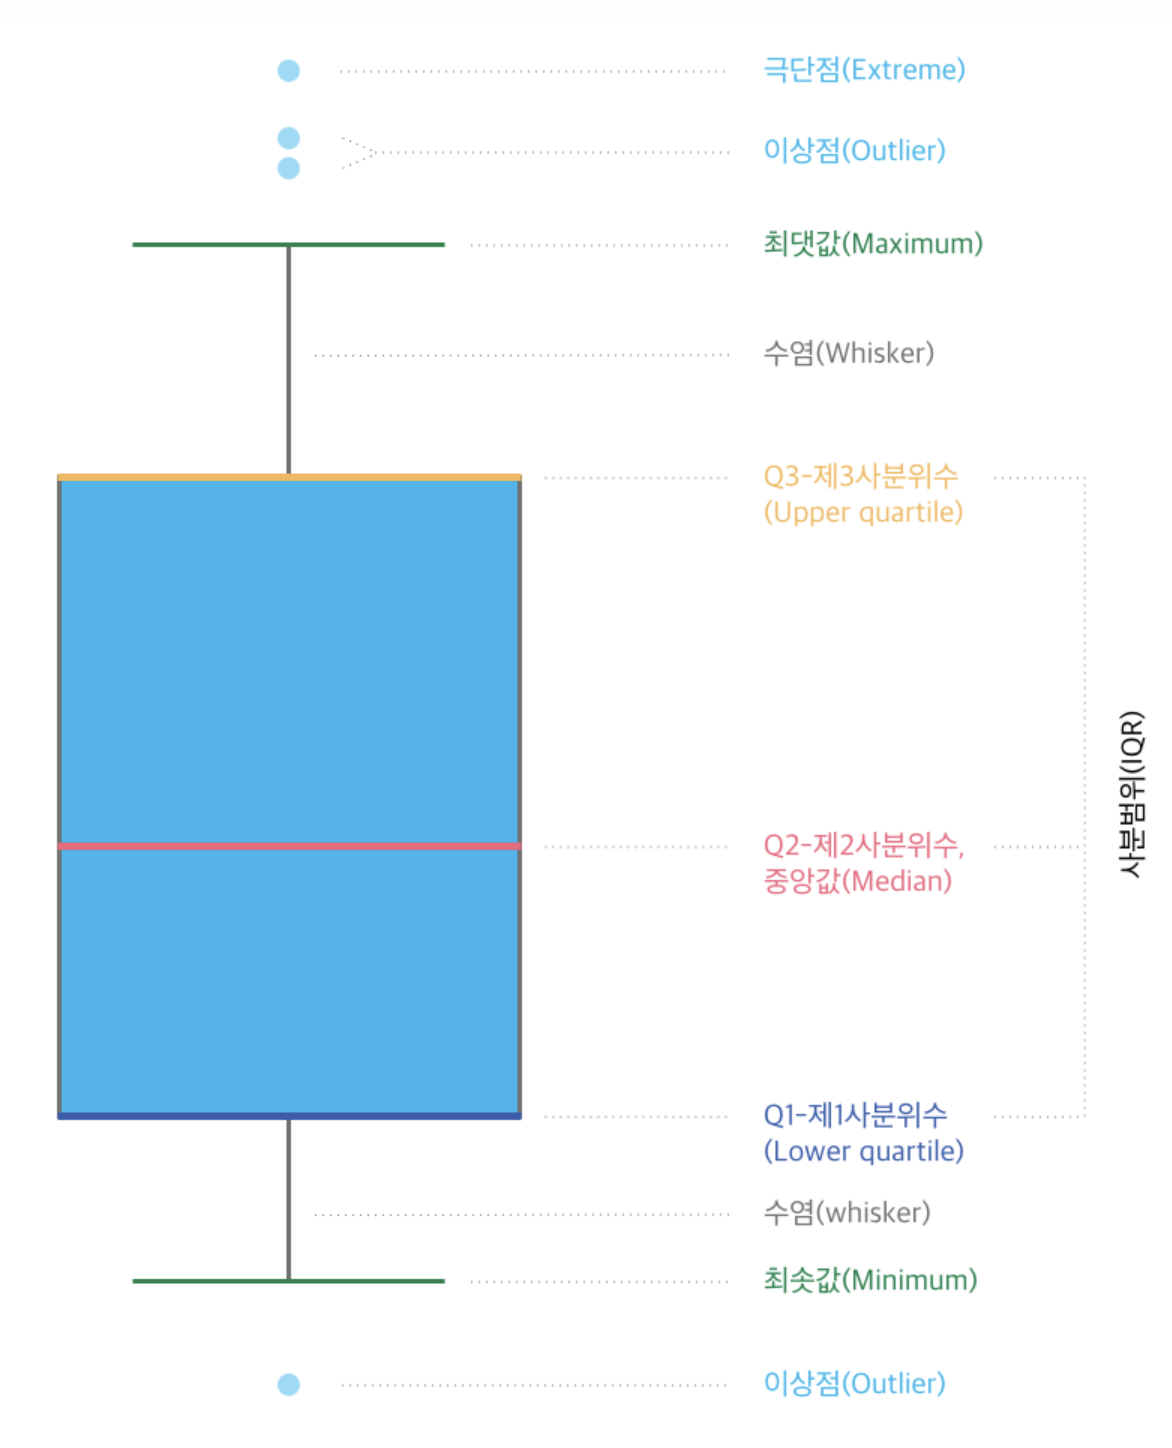

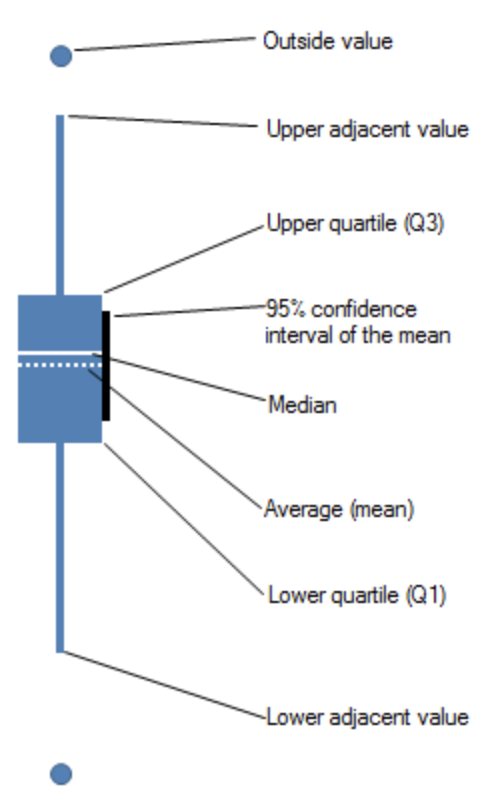

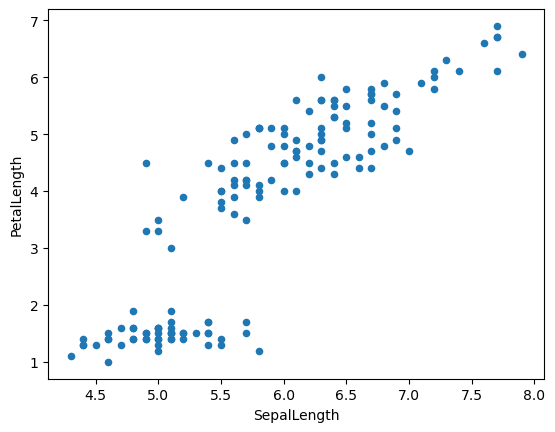

In [32]:
iris.plot(x='SepalLength', y='PetalLength', kind='scatter')
plt.show() # x축 꽃받침의 길이가 증가할 때 y축 꽃잎의 길이 값이 점점 증가하는 경향을 보인다.